<a href="https://colab.research.google.com/github/Hameedhullah/Machine-Learning/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install autoviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.7/68.7 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 433.8/433.8 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 49.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 60.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 47.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 60.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.8/20.8 MB 54.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.3/87.3 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 68.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 28.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.9/255.9 MB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.5/18.5 MB 58.4 MB/s eta 0:00:00
  Attempting uninstall: param
 

In [1]:
### Implementation of Simple,multiple,lasso,ridge,elastic net Regression

In [2]:
'''Simple Linear Regression'''

'Simple Linear Regression'

In [3]:
# Importing the library

import numpy as np
import pandas as pd
from autoviz.AutoViz_Class import AutoViz_Class
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

Imported v0.1.901. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)


In [4]:
# Importing the data

ad_data = pd.read_csv("Advertising.csv")
ad_data.head()

,ID,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
# Updating the index in data

ad_data.set_index('ID',inplace = True)
ad_data.sample(6)

,TV,radio,newspaper,sales
ID,,,,
136,48.3,47.0,8.5,11.6
128,80.2,0.0,9.2,8.8
192,75.5,10.8,6.0,9.9
67,31.5,24.6,2.2,9.5
120,19.4,16.0,22.3,6.6
112,241.7,38.0,23.2,21.8


In [6]:
# Profile of the data

ad_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [7]:
# Statistical Analysis

ad_data.describe(include = 'all').T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [8]:
# Null values

ad_data.isna().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [9]:
# Duplicates values

ad_data.duplicated().sum()

0

Shape of your Data Set loaded: (200, 5)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  4
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  0
    5 Predictors classified...
        1 variable(s) removed since they were ID or low-information variables
        List of variables removed: ['ID']
To fix these data quality issues in the dataset, import FixDQ fr

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
ID,int64,0.000000,100,1.000000,200.000000,Possible ID column: drop before modeling step.
TV,float64,0.000000,NA,0.700000,296.400000,No issue
radio,float64,0.000000,NA,0.000000,49.600000,No issue
newspaper,float64,0.000000,NA,0.300000,114.000000,Column has 2 outliers greater than upper bound (93.62) or lower than lower bound(-35.78). Cap them or remove them.
sales,float64,0.000000,NA,1.600000,27.000000,No issue


Number of All Scatter Plots = 10


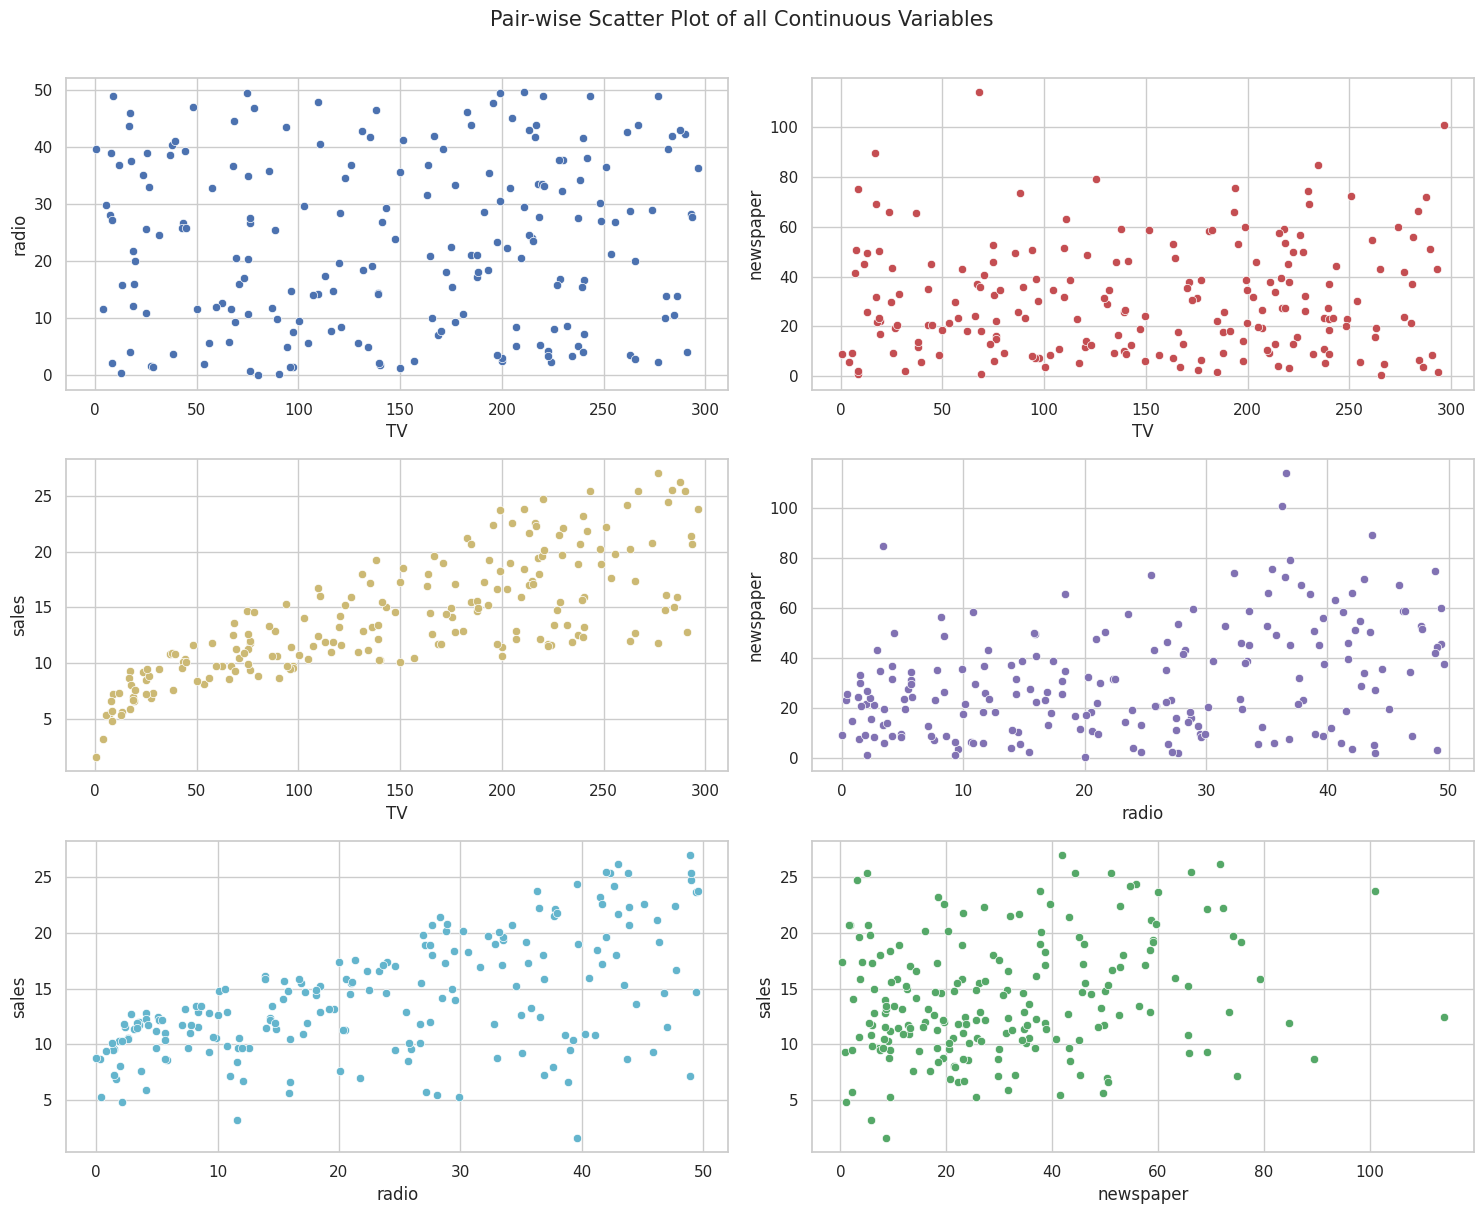

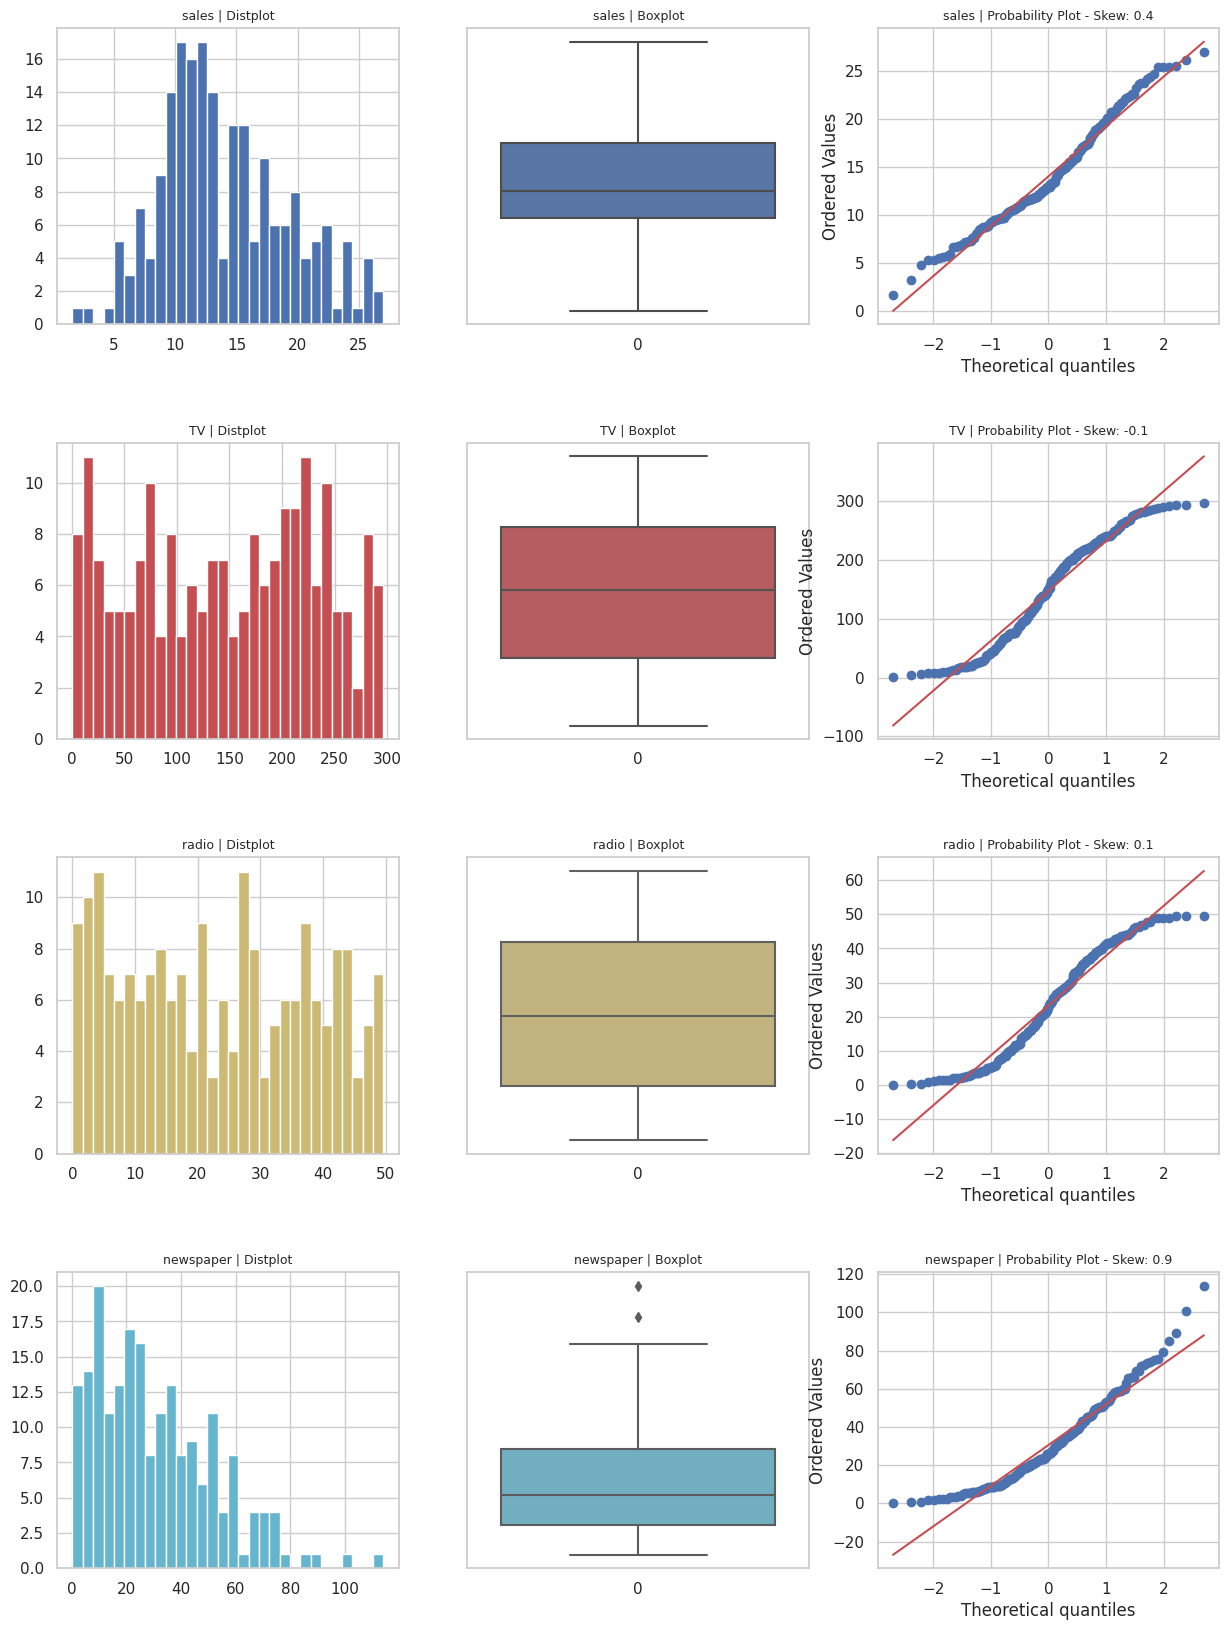

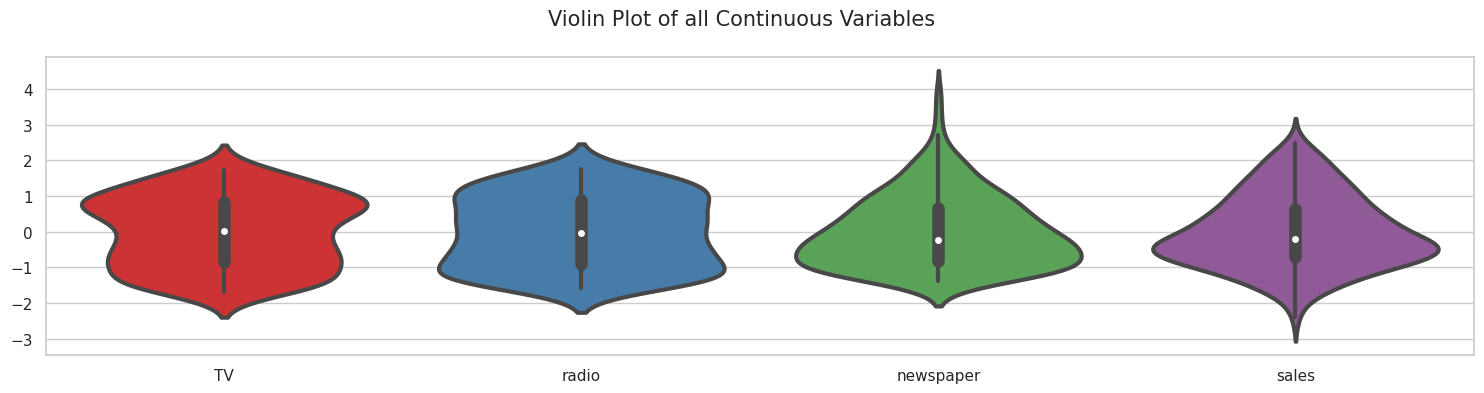

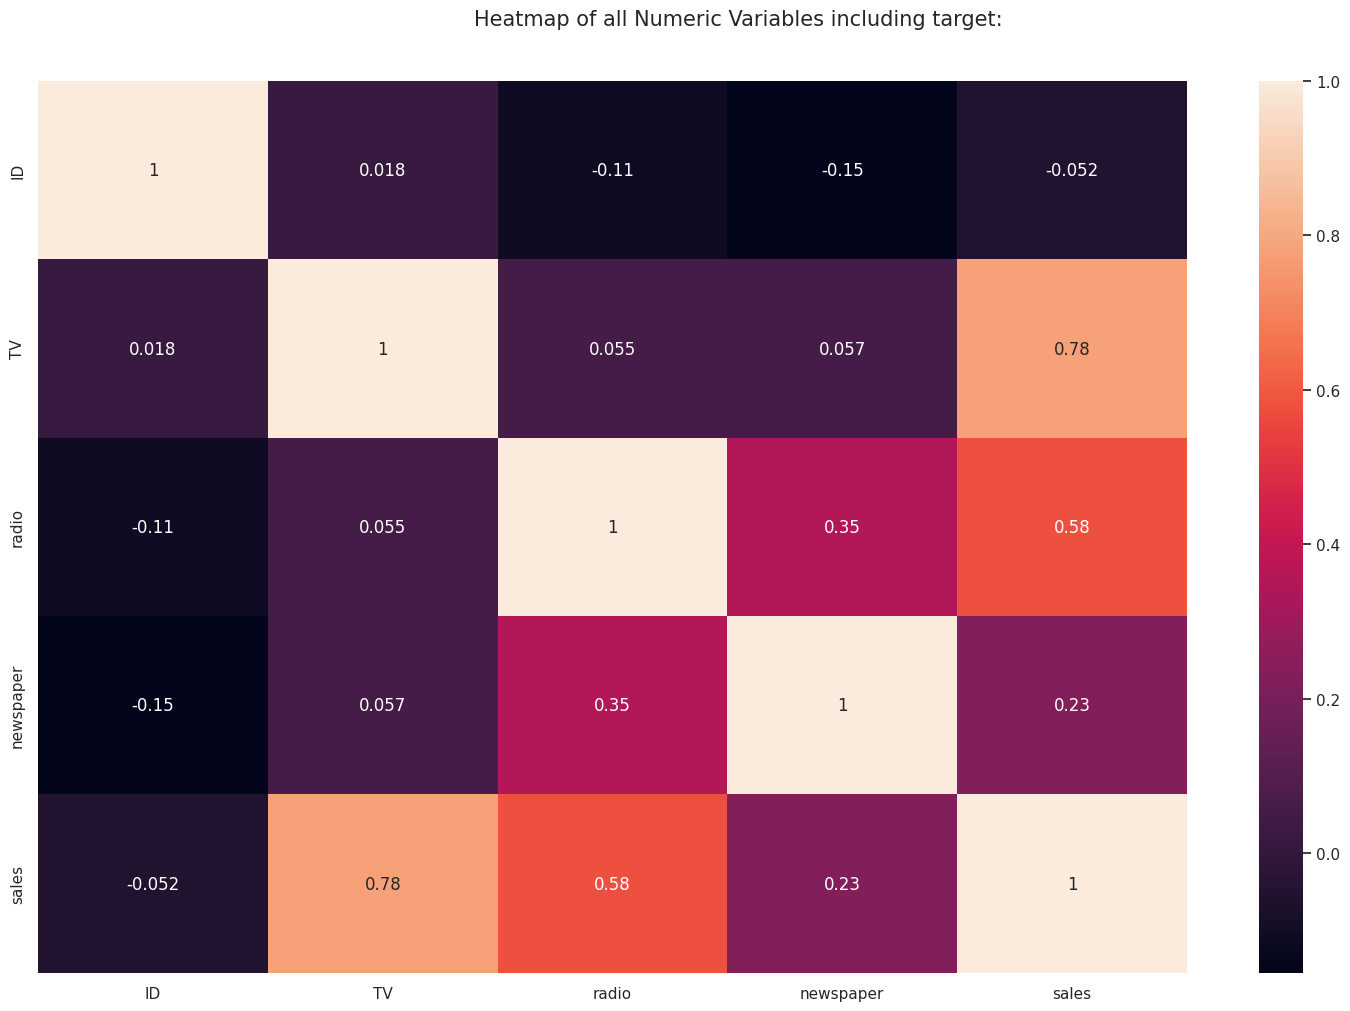

All Plots done
Time to run AutoViz = 7 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [10]:
# Graphical Analysis

AV = AutoViz_Class()
df = AV.AutoViz('Advertising.csv')

In [11]:
# Let split the train and test data (i.e.) dependent and independent variable with simple linear regression

X = ad_data[['TV']] #Independent feature
y = ad_data[['sales']] #Dependent featue


In [12]:
X.shape, y.shape

((200, 1), (200, 1))

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = .20,random_state = 42)

In [15]:
X_train.shape, X_test.shape

((160, 1), (40, 1))

In [16]:
y_train.shape, y_test.shape

((160, 1), (40, 1))

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
X_train

array([[-0.40424839],
       [ 0.32060772],
       [-1.27051084],
       [-1.04235941],
       [ 0.8791034 ],
       [-1.32873699],
       [-0.94373145],
       [-0.03231403],
       [-0.5397133 ],
       [-0.875999  ],
       [-0.85342151],
       [ 0.21841489],
       [-1.67928215],
       [-1.68997675],
       [-0.87481071],
       [-0.2450177 ],
       [-0.91045937],
       [ 1.65980907],
       [-1.54975868],
       [ 0.56539519],
       [ 1.59564148],
       [ 0.41448252],
       [-0.44108534],
       [-1.49985056],
       [ 1.67169196],
       [-1.55213526],
       [ 1.70615233],
       [-1.56045328],
       [-0.18679156],
       [-1.47846136],
       [-0.58962142],
       [-0.82965574],
       [ 0.45607263],
       [ 0.32060772],
       [-0.28898438],
       [ 0.70798983],
       [-0.08459873],
       [ 0.41448252],
       [ 0.86009078],
       [ 1.0894305 ],
       [-1.57827761],
       [-0.35077539],
       [-0.71676831],
       [ 0.48815642],
       [-0.88550531],
       [ 0

In [20]:
X_test

array([[ 0.15781217],
       [ 0.53925283],
       [ 1.69783431],
       [-1.64363349],
       [ 0.83513672],
       [-0.89025846],
       [ 0.79354661],
       [-1.18851892],
       [ 0.86009078],
       [ 0.29803023],
       [-1.40835233],
       [-1.11484502],
       [ 1.00387371],
       [-1.71849568],
       [-0.12500054],
       [ 0.23980408],
       [-1.69591819],
       [ 0.56539519],
       [-0.88788188],
       [ 1.03833409],
       [ 0.94445928],
       [-0.97700354],
       [-1.33111357],
       [ 1.19875306],
       [-0.96274407],
       [-1.14692882],
       [ 0.75433309],
       [-0.12737712],
       [-0.74647553],
       [-1.68284702],
       [ 0.59153754],
       [-0.96036749],
       [ 0.58084294],
       [-1.58184248],
       [ 1.55286309],
       [ 1.04784039],
       [-1.20871983],
       [ 1.46968288],
       [-0.38998892],
       [-1.45588388]])

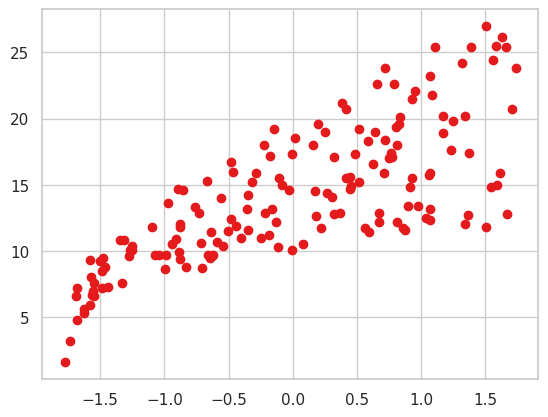

In [21]:
plt.scatter(X_train,y_train)

In [22]:
# Model Building

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

#Training the train data
regressor.fit(X_train,y_train)

LinearRegression()

In [23]:
regressor.intercept_

array([14.1])

In [24]:
regressor.coef_

array([[3.91569271]])

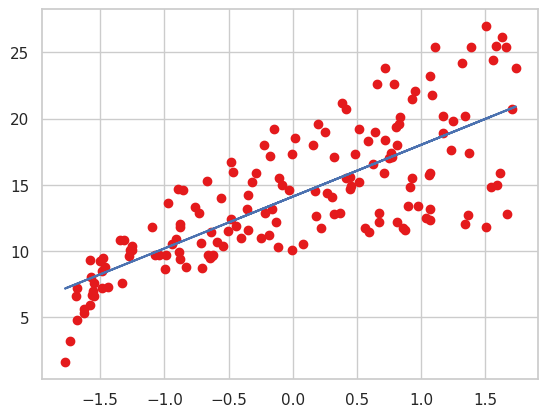

In [25]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regressor.predict(X_train),'b')

In [26]:
# Predicting the test data

y_pred_test = regressor.predict(X_test)
y_pred_test

array([[14.71794394],
       [16.2115484 ],
       [20.74819743],
       [ 7.66403631],
       [17.37013877],
       [10.61402143],
       [17.2072847 ],
       [ 9.44612512],
       [17.46785121],
       [15.2669948 ],
       [ 8.58532504],
       [ 9.73460946],
       [18.03086098],
       [ 7.37089899],
       [13.61053628],
       [15.03899911],
       [ 7.45930549],
       [16.31391381],
       [10.62332738],
       [18.16579721],
       [17.79821232],
       [10.27435438],
       [ 8.88776831],
       [18.79394862],
       [10.33019006],
       [ 9.60897918],
       [17.05373658],
       [13.60123034],
       [11.17703121],
       [ 7.51048819],
       [16.41627922],
       [10.339496  ],
       [16.37440246],
       [ 7.90599093],
       [20.18053468],
       [18.203021  ],
       [ 9.36702457],
       [19.85482655],
       [12.57292322],
       [ 8.39920611]])

In [27]:
# Performance Metric

from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

10.204654118800955
2.444420003751042
3.194472431998898


In [28]:
# Accuracy of the data
print("rsquared score")
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred_test)
score

rsquared score


0.6766954295627077

In [29]:
# Adjusted R-Squared score

1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6681874145511999

In [30]:
'''End of Simple Linear Regression'''

'End of Simple Linear Regression'

In [31]:
'''Multiple Linear Regression'''

'Multiple Linear Regression'

In [32]:
#Importing the data

admission = pd.read_csv("Admission_Prediction.csv")
admission.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [34]:
# updating the index for better performance in dataset in pandas dataframe

admission.set_index('Serial No.', inplace = True)
admission.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [35]:
# Names of Column

admission.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

In [37]:
# Updating the column names for better performance in pandas dataframe

admission.columns = admission.columns.str.strip().str.replace(' ', '_')

In [38]:
admission.columns

Index(['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance_of_Admit'],
      dtype='object')

In [39]:
 # Profile of the data

 admission.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 1 to 500
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE_Score          485 non-null    float64
 1   TOEFL_Score        490 non-null    float64
 2   University_Rating  485 non-null    float64
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance_of_Admit    500 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 35.2 KB


In [41]:
# Statistical Analysis

admission.describe(include = 'all').T

,count,mean,std,min,25%,50%,75%,max
GRE_Score,485.0,316.558763,11.274704,290.00,308.0000,317.00,325.00,340.00
TOEFL_Score,490.0,107.187755,6.112899,92.00,103.0000,107.00,112.00,120.00
University_Rating,485.0,3.121649,1.146160,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.374000,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.484000,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.576440,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.560000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance_of_Admit,500.0,0.721740,0.141140,0.34,0.6300,0.72,0.82,0.97


In [43]:
# Null Values

admission.isna().sum()

GRE_Score            15
TOEFL_Score          10
University_Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance_of_Admit       0
dtype: int64

In [46]:
# list of features which has missing values
features_with_na = [features for features in admission.columns if admission[features].isnull().sum()>1]

# The feature name and the percentage of missing values
for feature in features_with_na:
  print(feature,np.round(admission[feature].isnull().mean(),4), "% missing values")

GRE_Score 0.03 % missing values
TOEFL_Score 0.02 % missing values
University_Rating 0.03 % missing values


In [47]:
# Duplicates values

admission.duplicated().sum()

0

Shape of your Data Set loaded: (500, 9)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  7
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  1
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  0
    9 Predictors classified...
        1 variable(s) removed since they were ID or low-information variables
        List of variables removed: ['Serial No.']
To fix these data quality issues in the dataset, import 

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
Serial No.,int64,0.000000,100,1.000000,500.000000,Possible ID column: drop before modeling step.
GRE Score,float64,3.000000,NA,290.000000,340.000000,"15 missing values. Impute them with mean, median, mode, or a constant value such as 123."
TOEFL Score,float64,2.000000,NA,92.000000,120.000000,"10 missing values. Impute them with mean, median, mode, or a constant value such as 123., Column has a high correlation with ['GRE Score']. Consider dropping one of them."
University Rating,float64,3.000000,NA,1.000000,5.000000,"15 missing values. Impute them with mean, median, mode, or a constant value such as 123."
SOP,float64,0.000000,NA,1.000000,5.000000,No issue
LOR,float64,0.000000,NA,1.000000,5.000000,Column has 1 outliers greater than upper bound (5.50) or lower than lower bound(1.50). Cap them or remove them.
CGPA,float64,0.000000,NA,6.800000,9.920000,"Column has a high correlation with ['GRE Score', 'TOEFL Score']. Consider dropping one of them."
Research,int64,0.000000,0,0.000000,1.000000,No issue
Chance of Admit,float64,0.000000,NA,0.340000,0.970000,"Column has 2 outliers greater than upper bound (1.10) or lower than lower bound(0.35). Cap them or remove them., Column has a high correlation with ['GRE Score', 'CGPA']. Consider dropping one of them."


Number of All Scatter Plots = 28


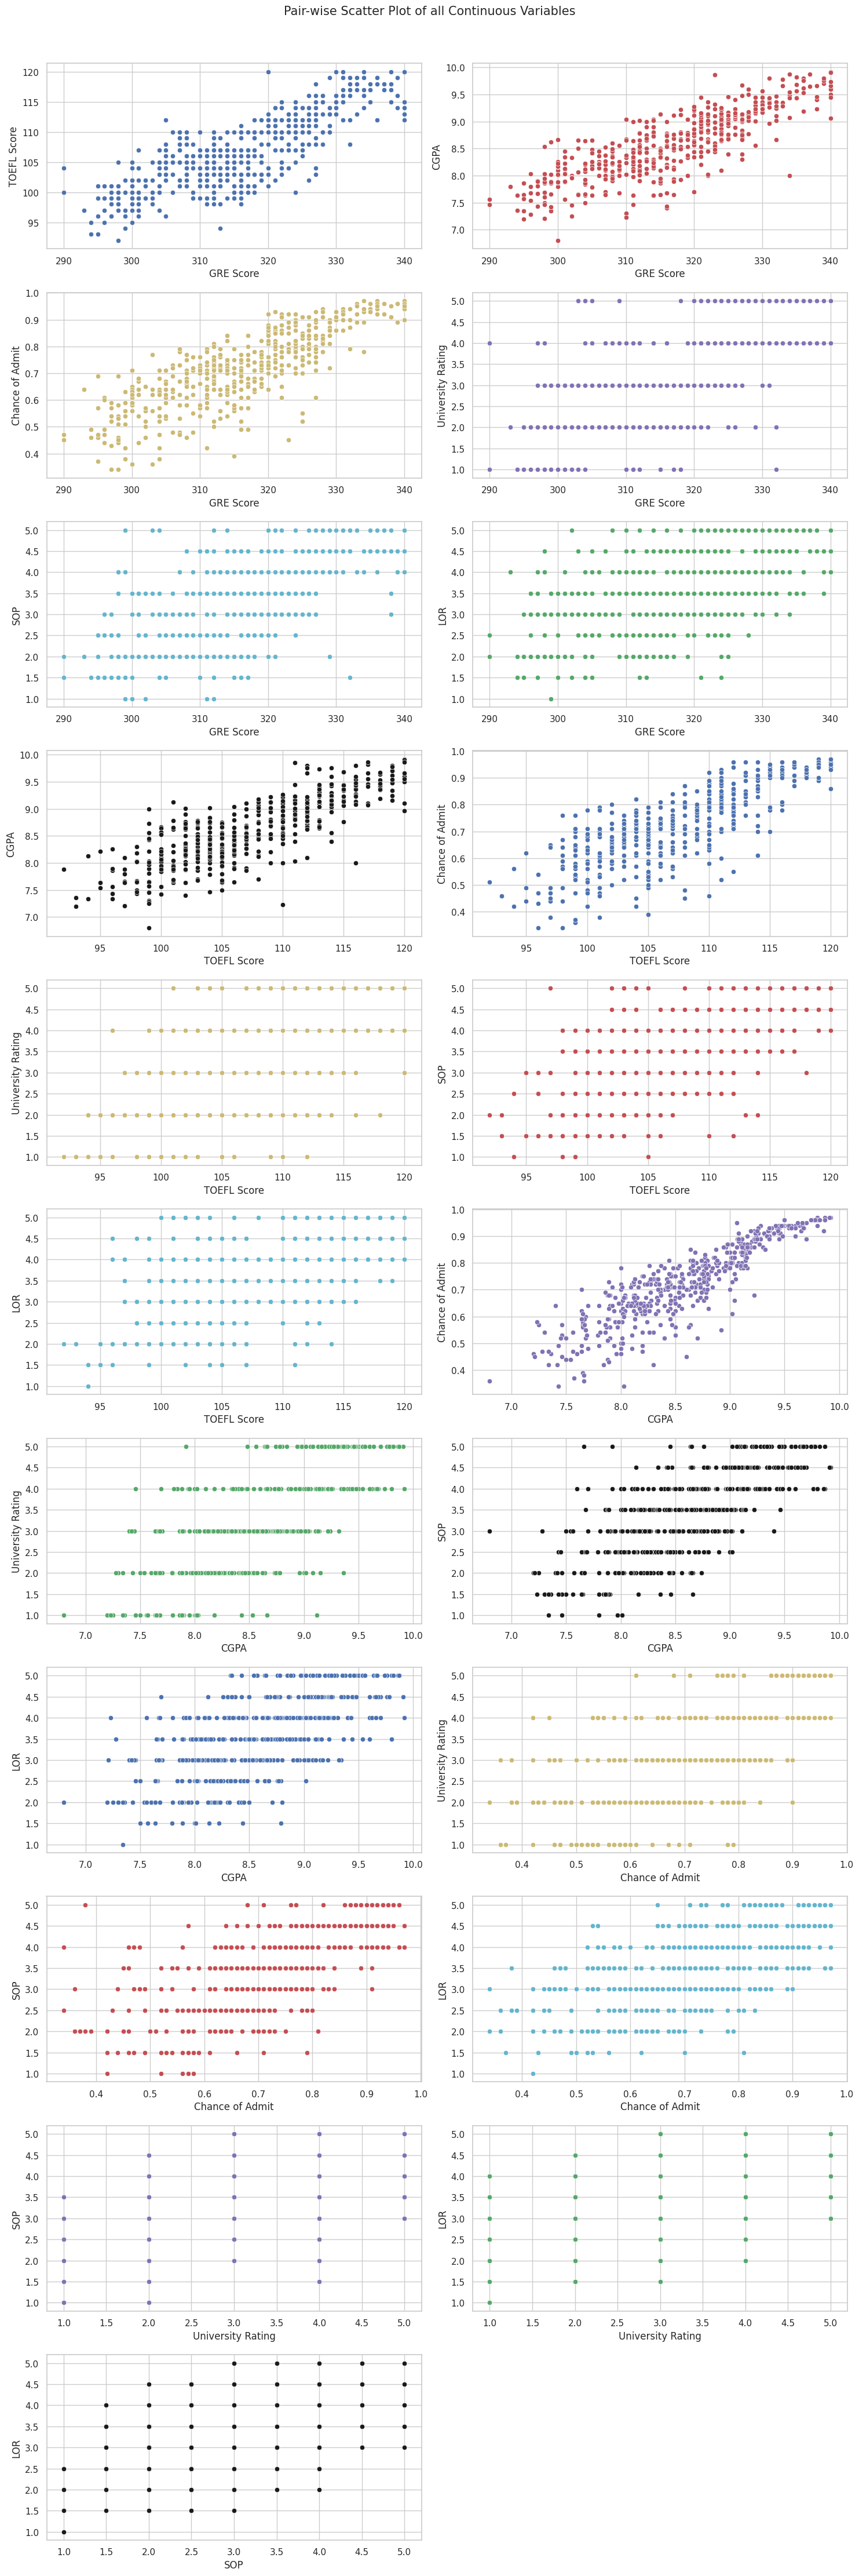

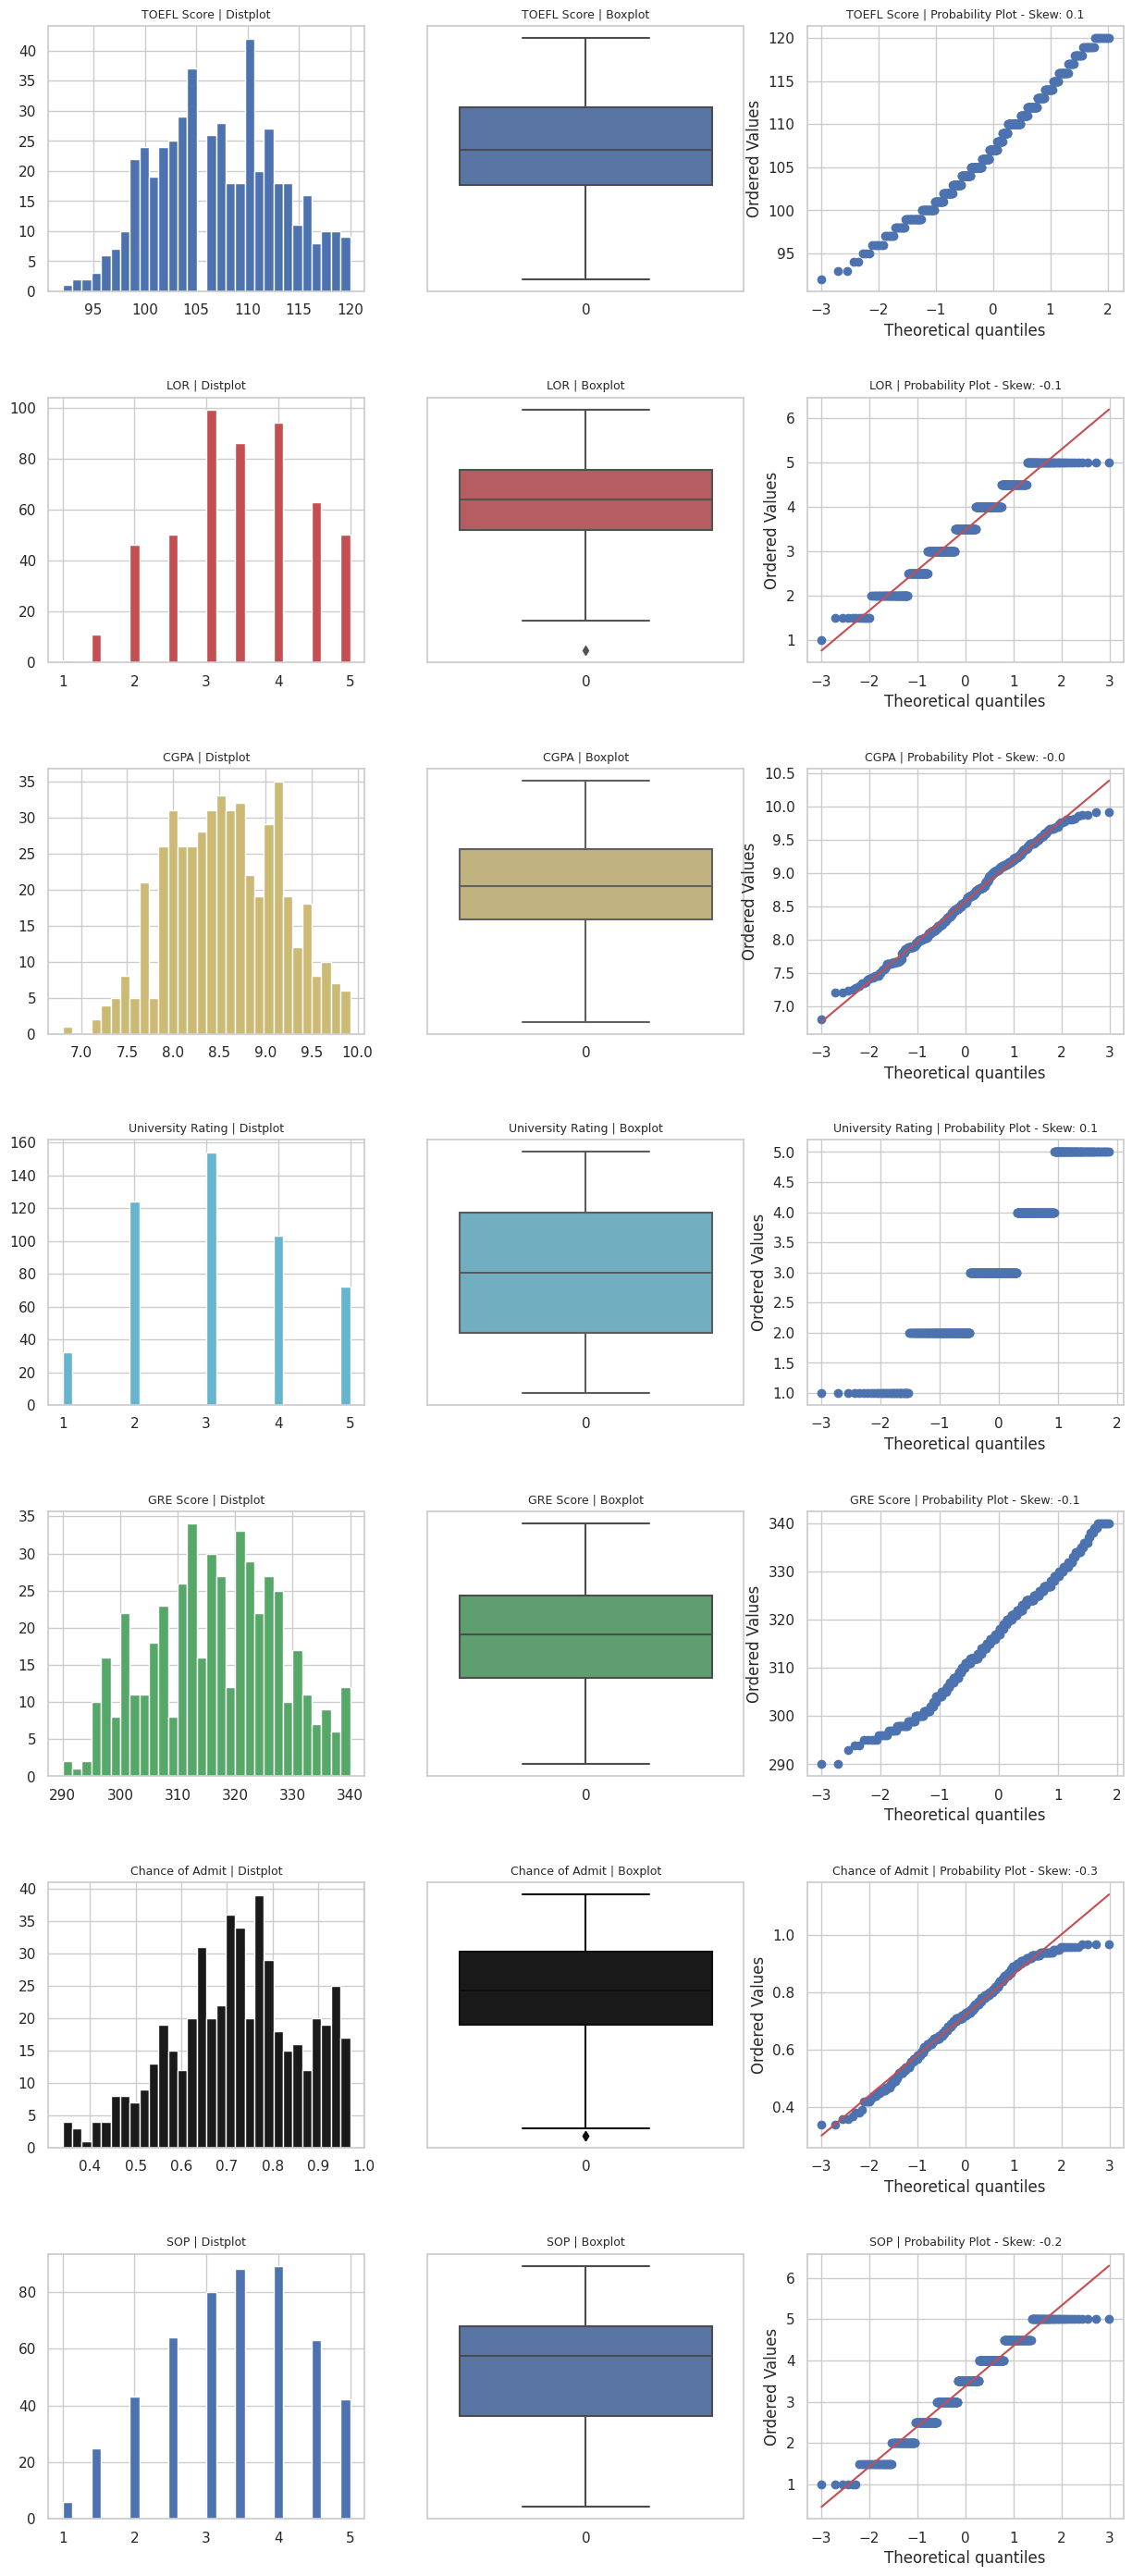

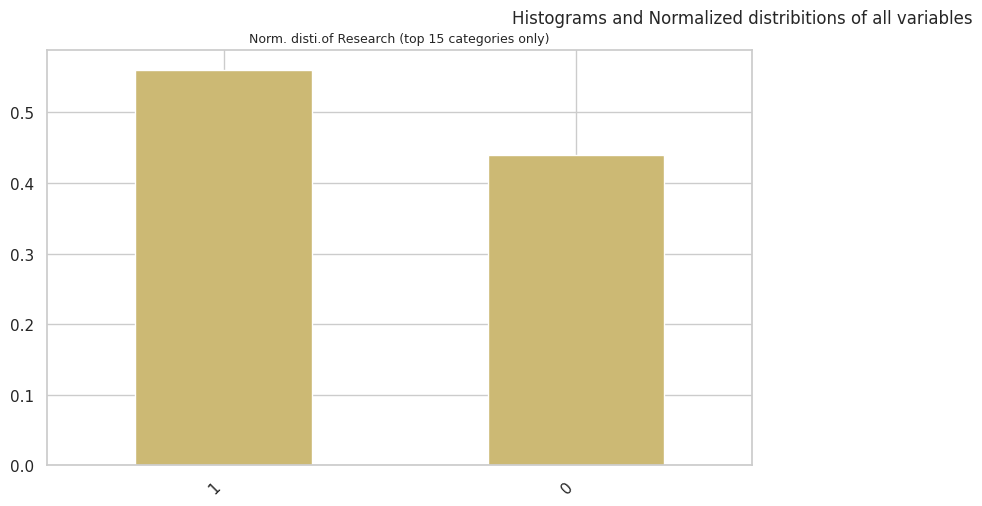

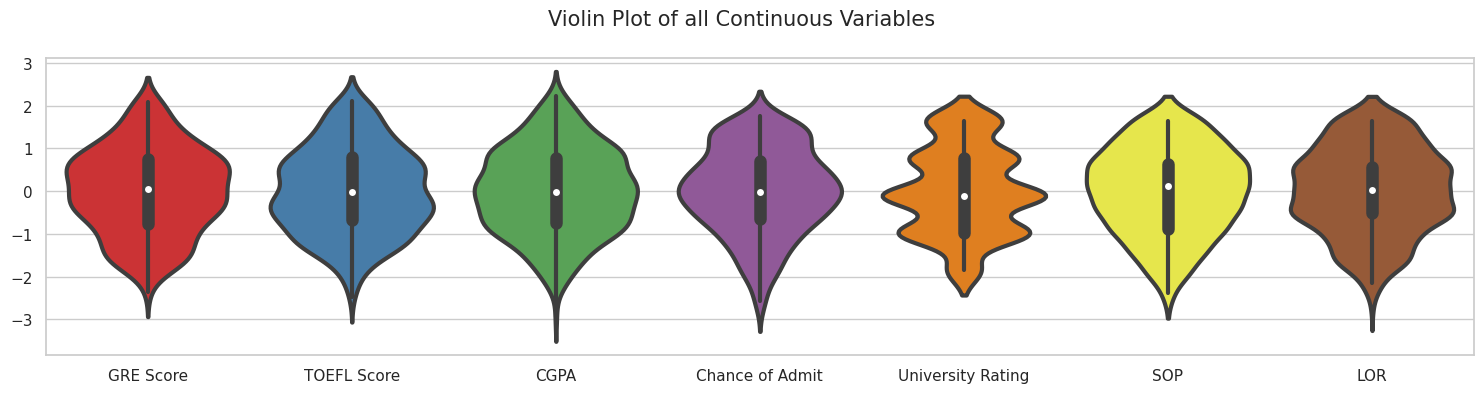

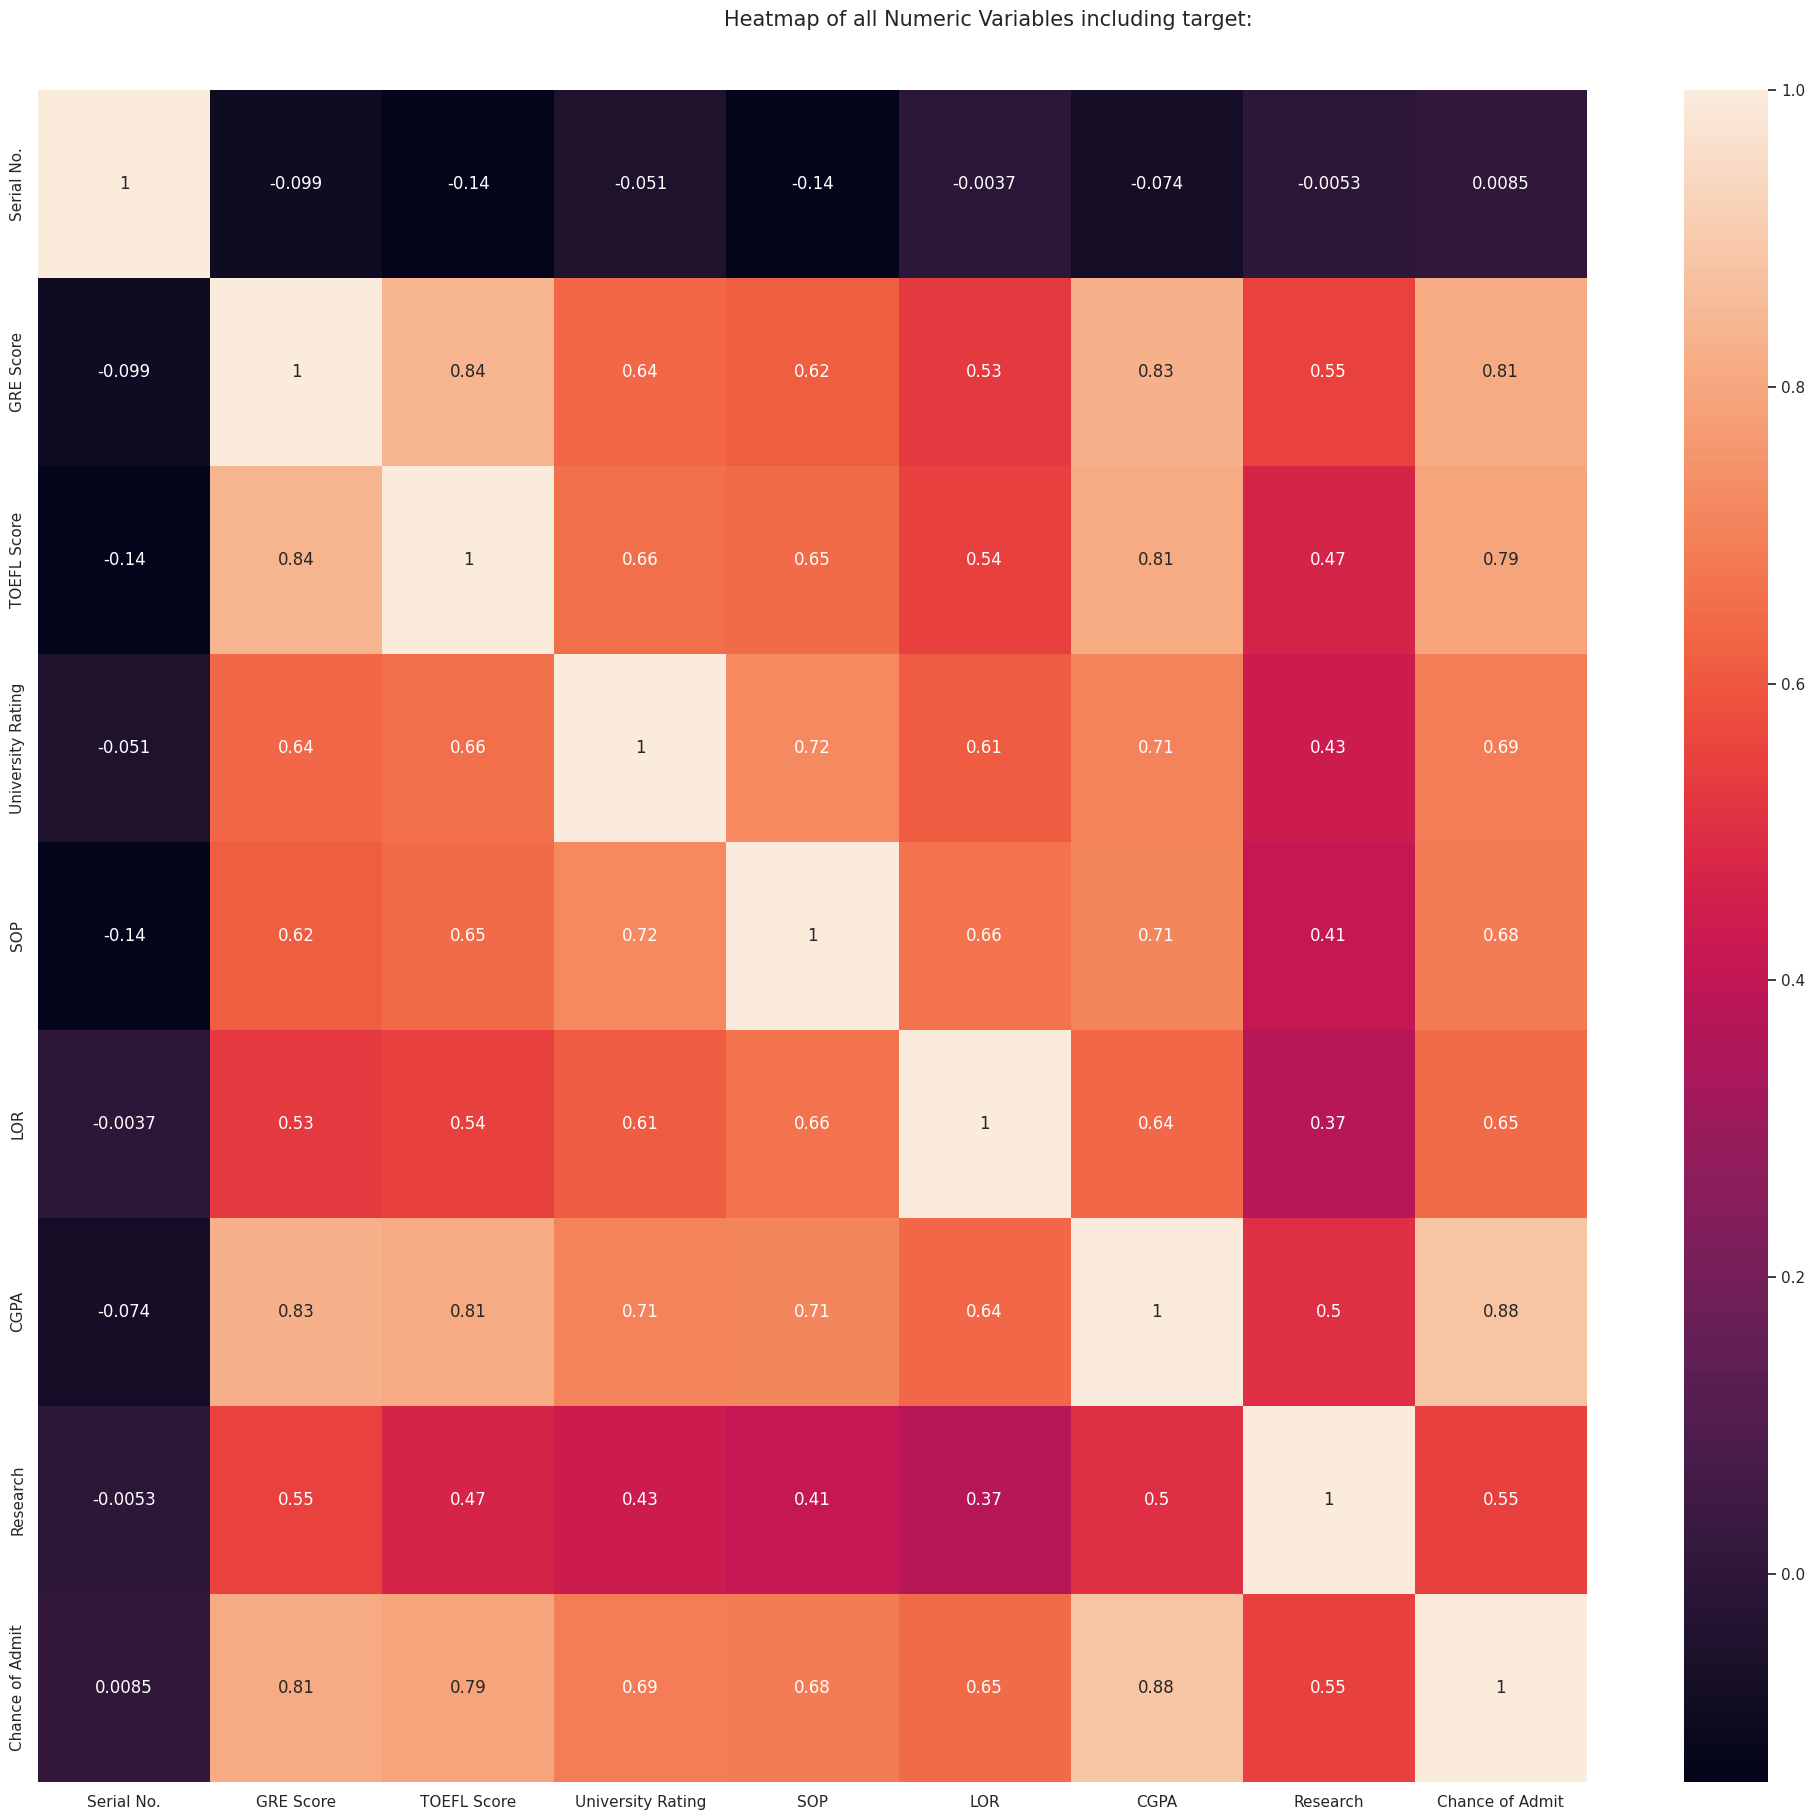

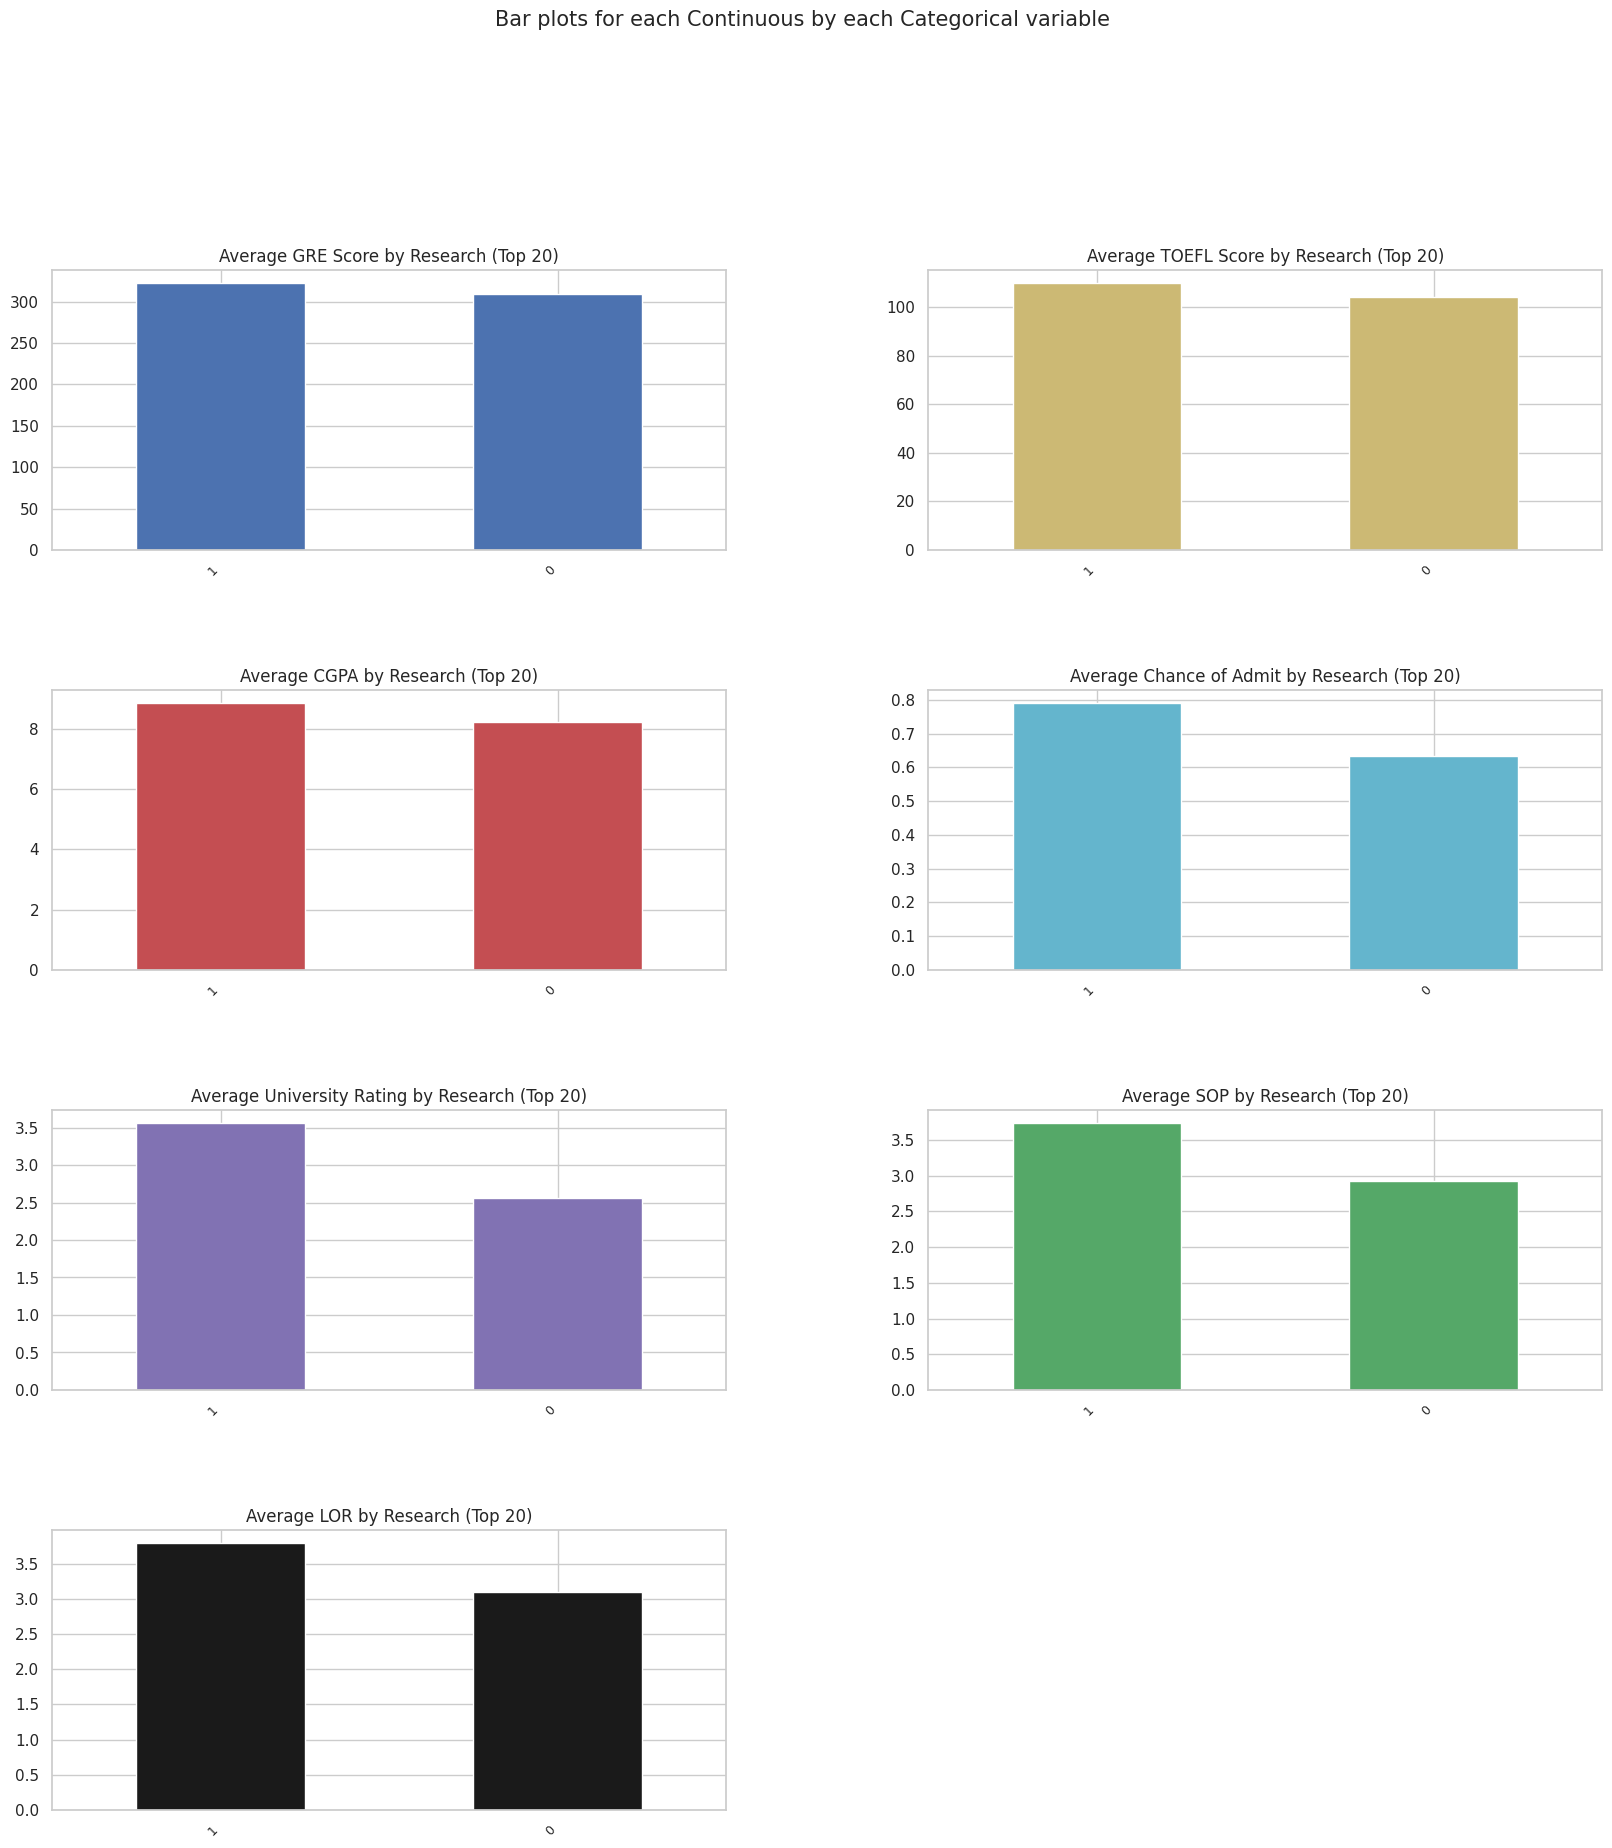

All Plots done
Time to run AutoViz = 21 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [48]:
# Graphical Analysis

AV = AutoViz_Class()
df = AV.AutoViz('Admission_Prediction.csv')